In [1]:
import astropy.visualization as vis
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import os
import numpy as np
import urllib.request
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
from astropy.table import hstack
from astropy.table import vstack
from astropy import wcs
from itertools import product
from scipy.stats import binned_statistic as bs
%matplotlib inline 
import seaborn as sns 
from astroML.stats import sigmaG
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=True)

Read in all visits,  per processing (DECAPS / LSST) . As we perform the cleaning, store ( per processing ) 
* N_sources_MAF  per visit 
* visit number 
* density 
* N sources in input catalog 
* N sources flagged due  to low S/N
* N sources flagged due to negative flux
* N sources flagged due to bad mask/flag info   
* total N sources that were considered 'bad', 
* total N sources left in the 'clean' ( per visit ) 
* total N sources left in the 'clean' (per sq.degree)
* total N sources left in the 'clean' (N_sources / arcsec_sq)*PSF units , as in Jim Bosch presentation 




In [76]:
# First do that for all visits done earlier : 
# for LSST-DECAPS comparisons
#visit_density_dic = {'20':[611529,609754,525814,525900],
#                     '15':[611970,525837,525838],
#                     '10':[611969,525846,525879],
#                      '5':[525904,525920]}    

# pairs of visits catalog ... 
# for LSST-LSST,  DECAPS-DECAPS of different epochs 
#visit_info = Table.read('decaps_rms_different_epoch_fields.txt', format='ascii')

# From here , visit1  or visit2 could be used 

In [75]:
#visit_info

## Astrometry 

**LSST- DECAPS** For the same sources from two source catalogs from the two different pipelines processing exactly the same image  



In [2]:
visit_info = Table.read('decaps_lsst_visit_info.txt', format='ascii')

In [3]:
def plot_dra_ddec_lsst_decaps(dra,ddec, visit, mag_cut):
    fig = plt.figure(figsize=(10, 7.5))
    lim  = 0.3  
    # First axis : the hexbin plot ... 
    ax = fig.add_axes([0.35, 0.35, 0.45, 0.6], xticks=[], yticks=[])
    im1 = ax.hexbin(dra, ddec, bins='log', cmap=plt.cm.viridis,
                   mincnt=1, extent=(-0.5, 0.5, -0.5,0.5))
    ax.set_title(str(visit)+', '+r'$m<$'+str(mag_cut))
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.plot([-lim,lim], [0.0, 0.0], '-k', c='red')
    ax.plot([0,0], [-lim, lim], '-k', c='red')

    # Add colorbar 
    cax = plt.axes([0.82, 0.35, 0.02, 0.6])
    cb = plt.colorbar(im1, cax=cax)
    cb.set_label(r'$\log (N)$')
    #plt.clim(-7, 0)
    
    # Bottom axis : histogram of RA 
    ax1 = fig.add_axes([0.35, 0.1, 0.45, 0.23], yticks=[])
    ax1.hist(dra.data, bins=50, histtype='stepfilled', ec='k', fc='#AAAAAA',
             range=(-lim,lim))
    ax1.set_xlabel(r'$\Delta RA ``$')
    ax1.set_ylabel('N(r, r+dr)')
    ax1.set_xlim(-lim,lim)

    # Left axis : histogram of DEC 
    # #https://matplotlib.org/examples/pylab_examples/scatter_hist.html
    ax2 = fig.add_axes([0.15, 0.35, 0.18, 0.6], xticks=[])
    ax2.hist(ddec.data,orientation='horizontal',bins=50, 
             histtype='stepfilled', ec='k', fc='#AAAAAA',
             range=(-lim,lim))
    ax2.set_xlabel('N(r, r+dr)')
    ax2.set_ylabel(r'$\Delta DEC ``$')
    ax2.set_ylim(-lim,lim)
    ax2.set_xlim(ax2.get_xlim()[::-1])  # reverse x axis
    
     # calcualate median and sigmaG
    medra, meddec = 1000*np.median(dra),1000*np.median(ddec)  # miliarcsec 
    sigra, sigdec = 1000*sigmaG(dra), 1000*sigmaG(ddec)
    
    dic = {'medra':medra, 'meddec':meddec, 'sigra':sigra, 'sigdec':sigdec}
    # add the info to the plot 
    
    d = 0.03
    x0,y0 = 0.15, 0.25 
    fig.text(x0,y0, 'med'+r'$(\Delta\alpha)$='+str(medra)[:5])
    fig.text(x0,y0-d, 'med'+r'$(\Delta\delta)$='+str(meddec)[:5])
    fig.text(x0,y0-2*d, r'$\sigma_{G}$'+r'$(\Delta\alpha)$='+str(sigra)[:5])
    fig.text(x0,y0-3*d, r'$\sigma_{G}$'+r'$(\Delta\delta)$='+str(sigdec)[:5])
    
    plt.savefig(str(visit)+'_RA_DEC_offset_lims.png', bbox_inches='tight')
    plt.show()
    
    return dic
    

In [ ]:
#visit_table = Table.read('decaps_lsst_visit_info.txt', format='ascii')

Compare DECAPS to LSST of the same field : 

Comparing DECAPS-LSST for  525814


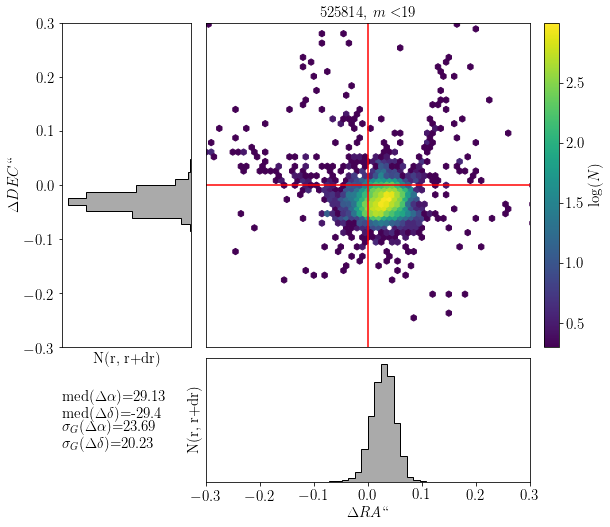

Comparing DECAPS-LSST for  525837


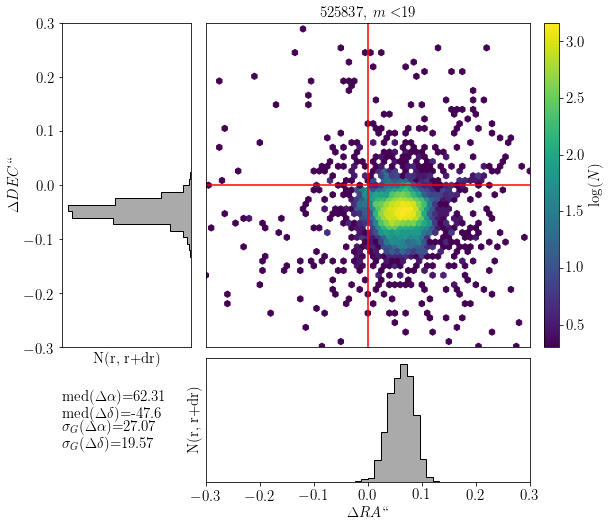

Comparing DECAPS-LSST for  525838


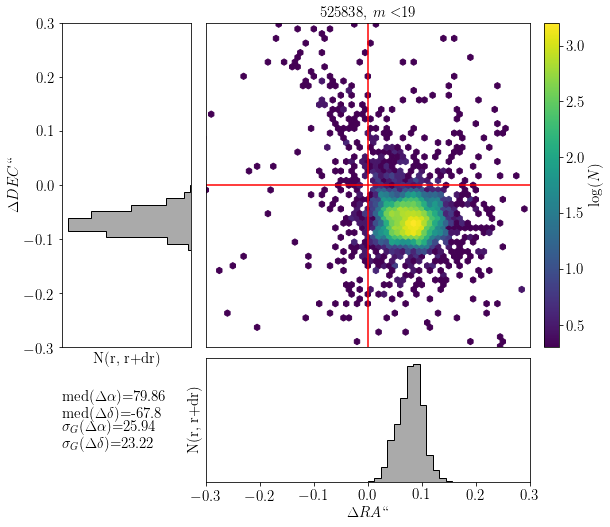

Comparing DECAPS-LSST for  525846


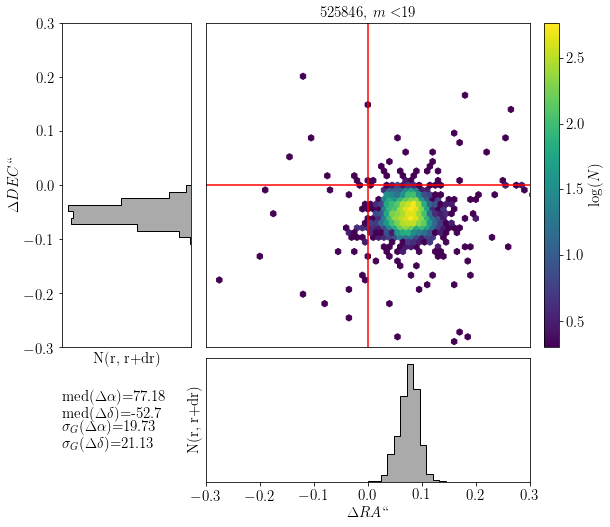

Comparing DECAPS-LSST for  525879


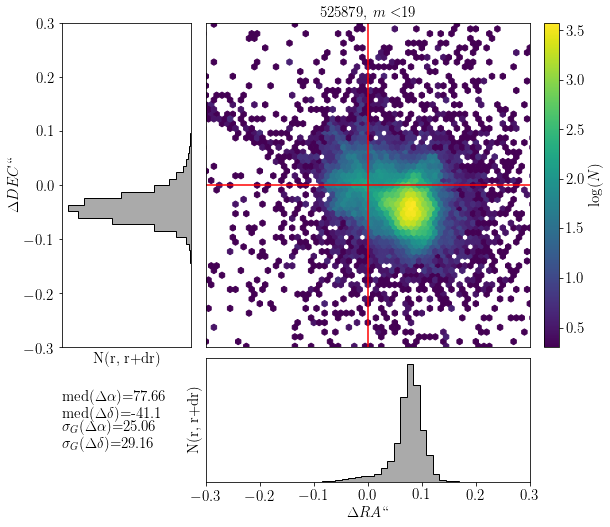

Comparing DECAPS-LSST for  525900


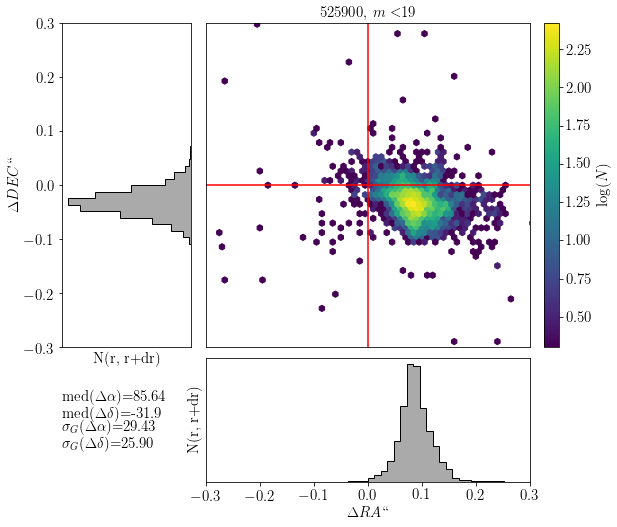

Comparing DECAPS-LSST for  525904


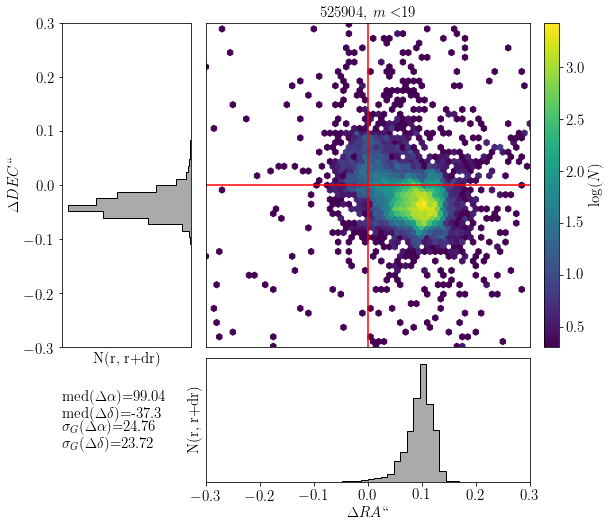

Comparing DECAPS-LSST for  525920


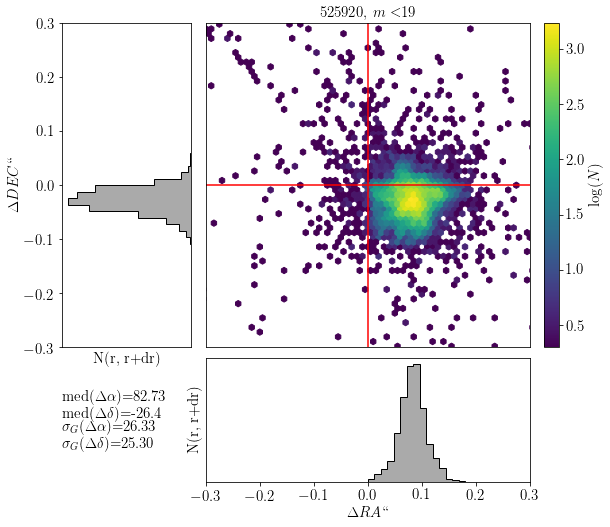

Comparing DECAPS-LSST for  526028


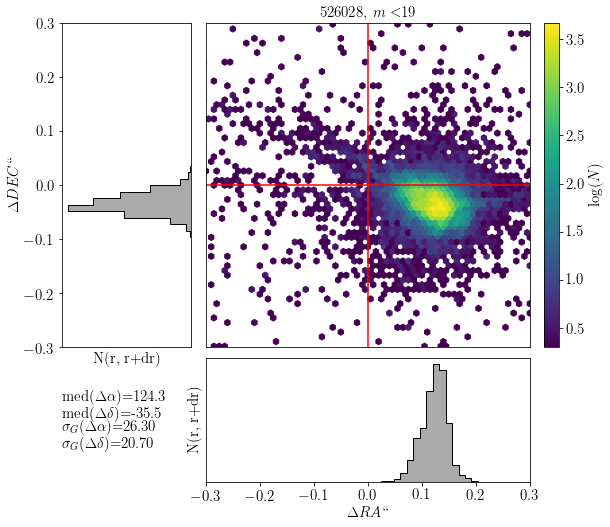

Comparing DECAPS-LSST for  526152


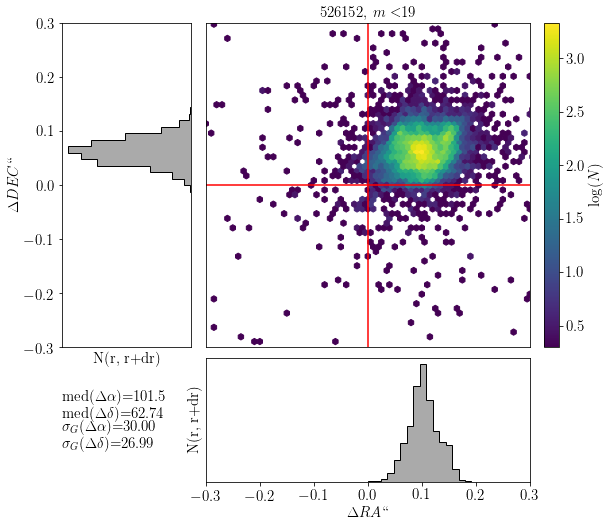

Comparing DECAPS-LSST for  526413


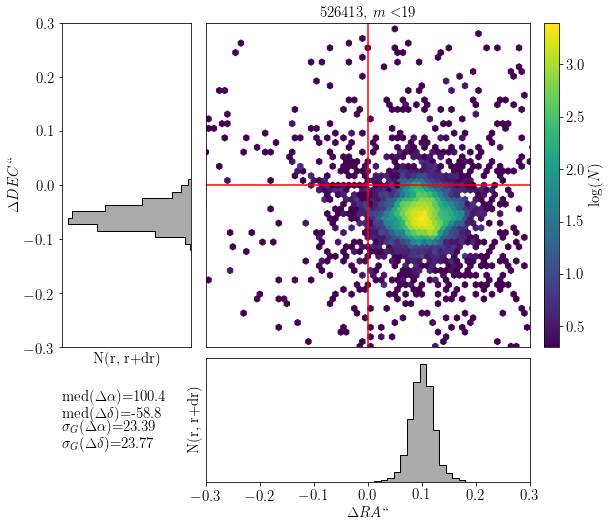

Comparing DECAPS-LSST for  527064


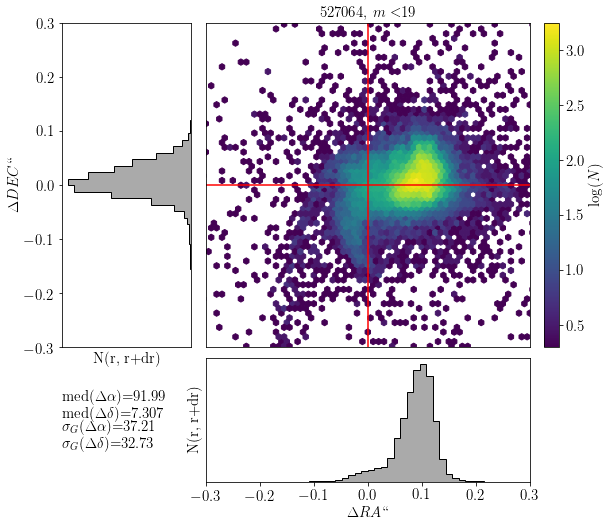

Comparing DECAPS-LSST for  527096


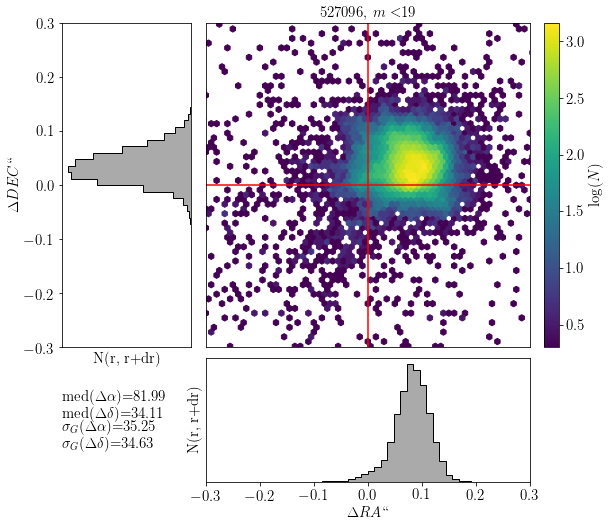

Comparing DECAPS-LSST for  527246


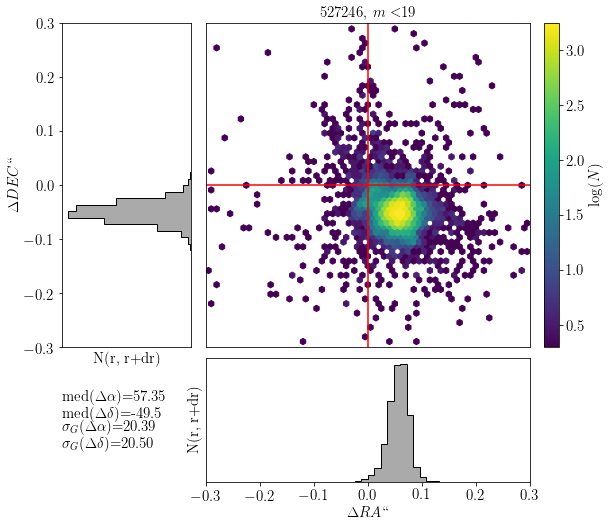

Comparing DECAPS-LSST for  527247


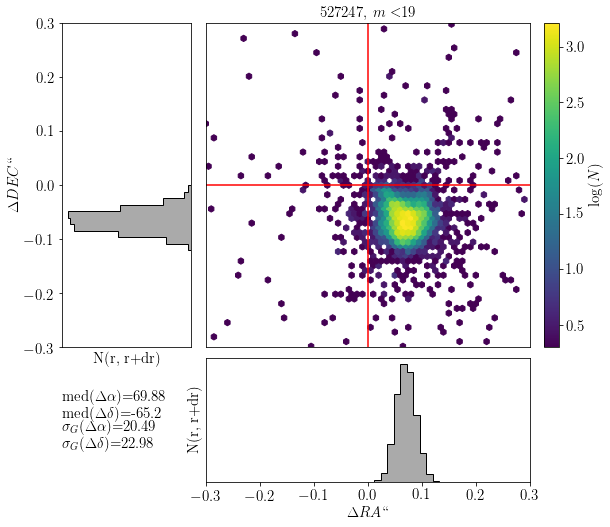

Comparing DECAPS-LSST for  527296


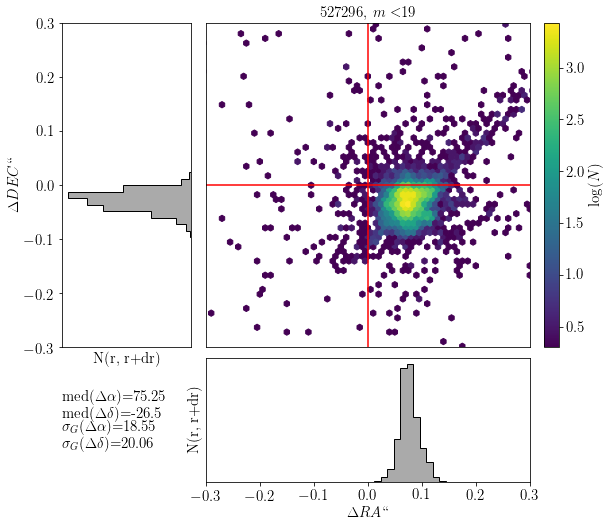

Comparing DECAPS-LSST for  527300


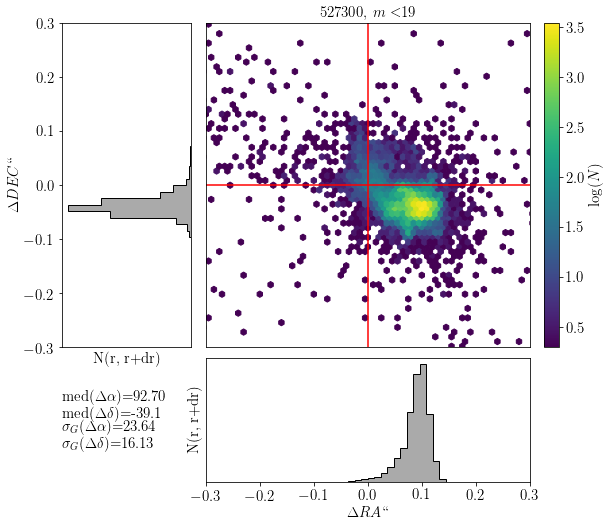

Comparing DECAPS-LSST for  527319


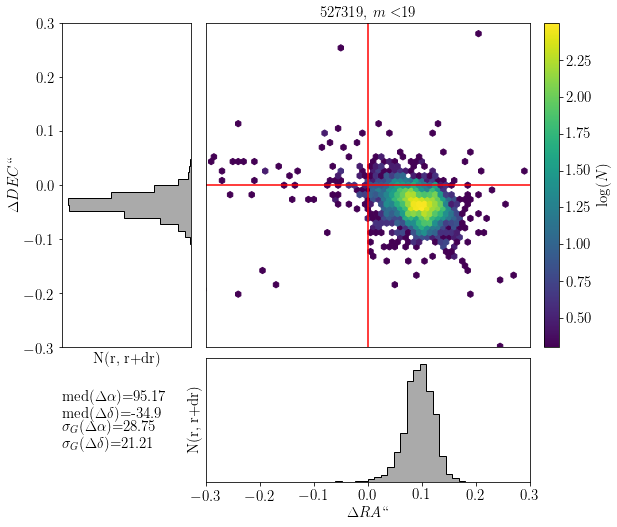

Comparing DECAPS-LSST for  527453


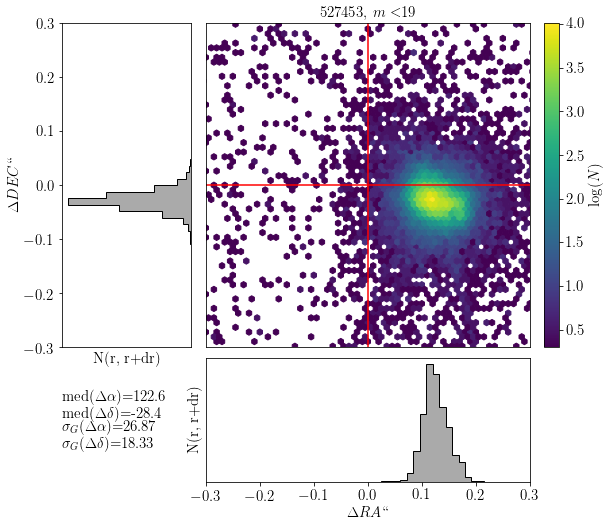

Comparing DECAPS-LSST for  529974


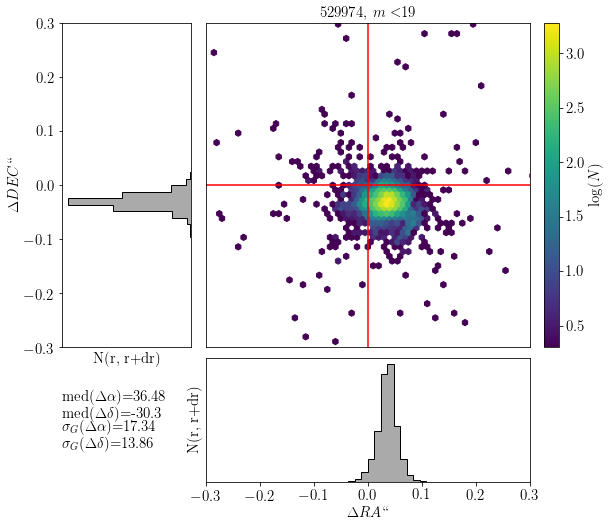

Comparing DECAPS-LSST for  529989


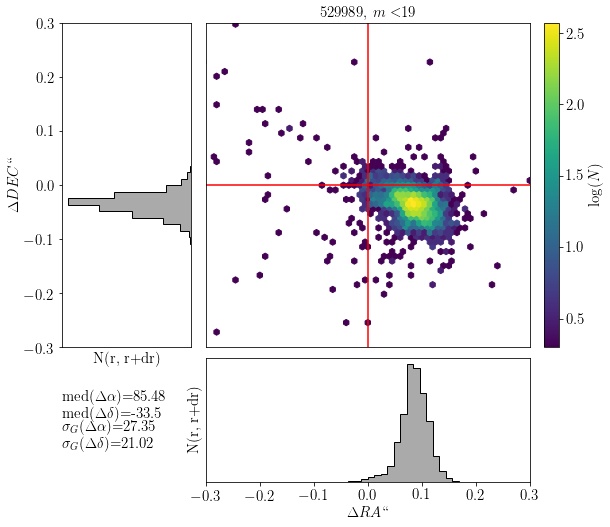

Comparing DECAPS-LSST for  530012


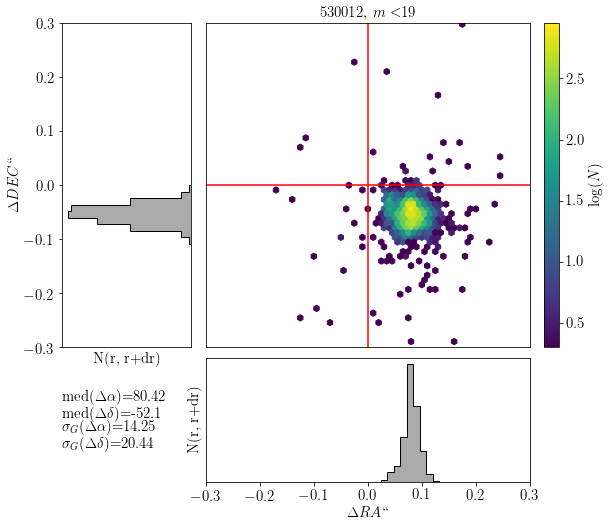

Comparing DECAPS-LSST for  530032


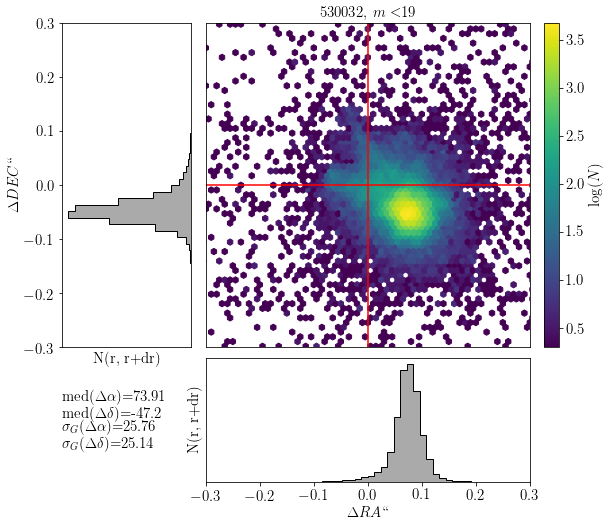

Comparing DECAPS-LSST for  567283


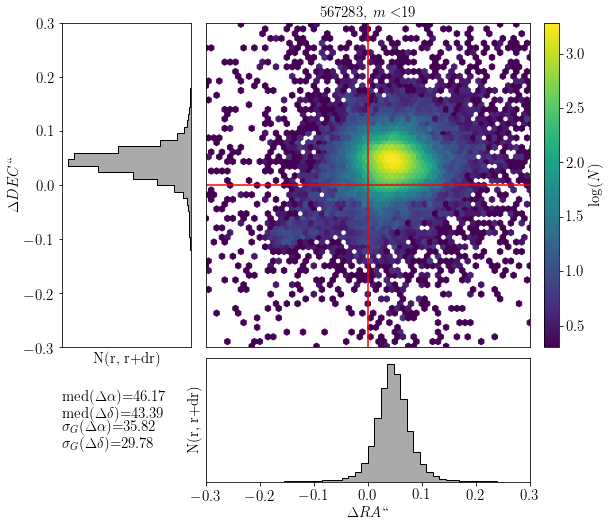

Comparing DECAPS-LSST for  567795


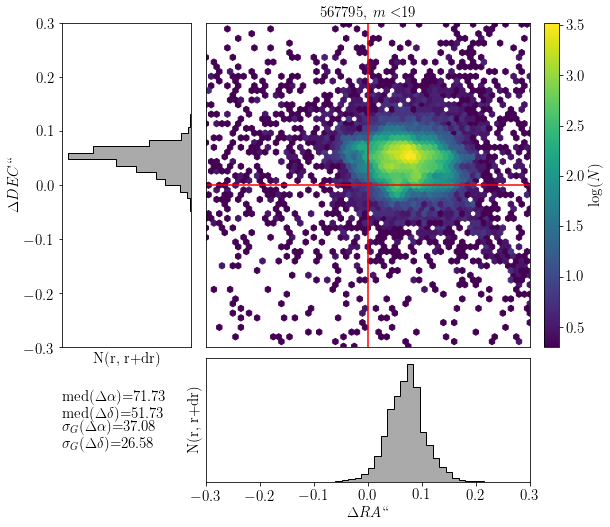

Comparing DECAPS-LSST for  568172


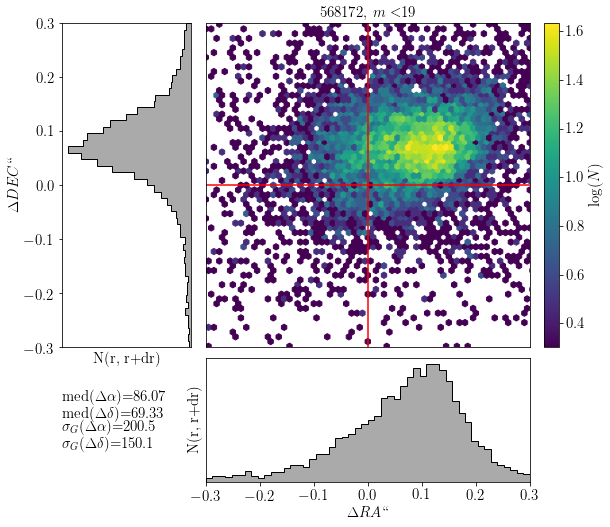

Comparing DECAPS-LSST for  609754


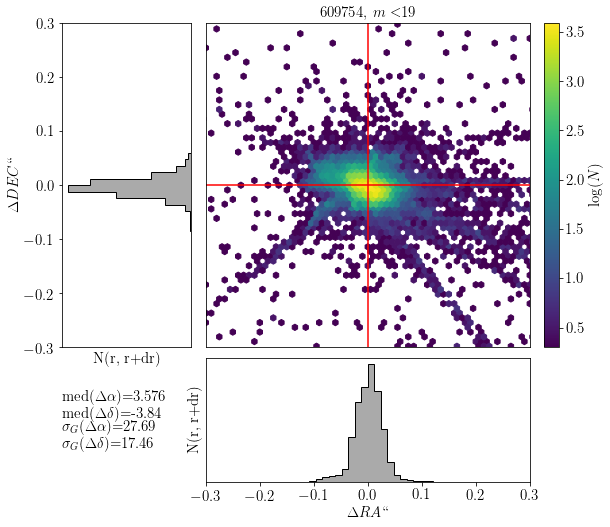

Comparing DECAPS-LSST for  611529


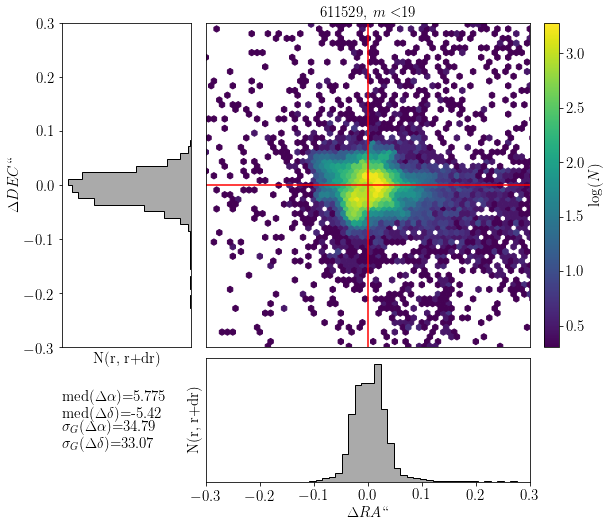

Comparing DECAPS-LSST for  611969


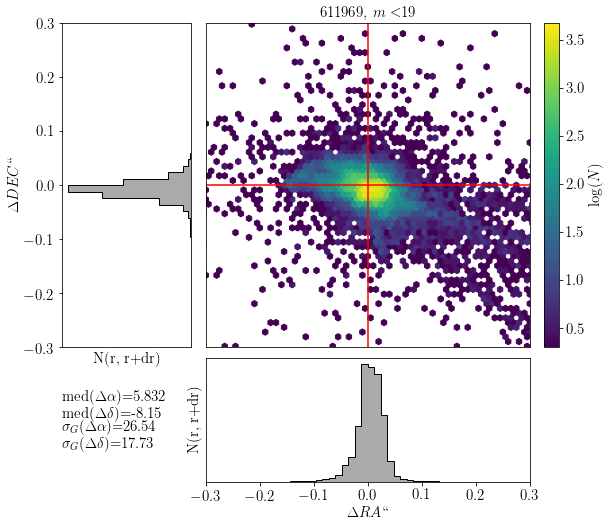

Comparing DECAPS-LSST for  611970


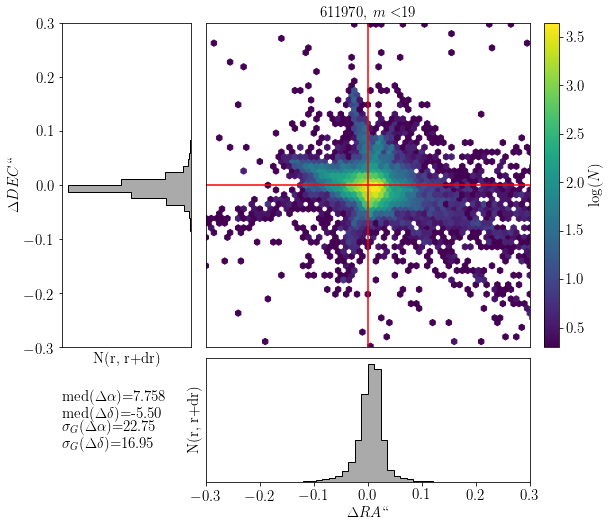

Comparing DECAPS-LSST for  611980


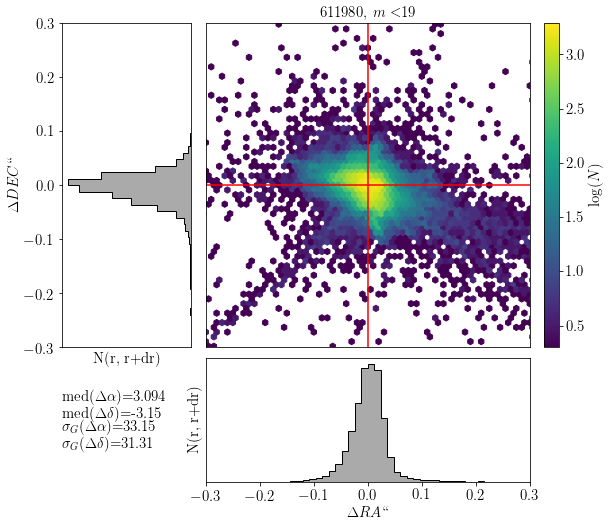

Comparing DECAPS-LSST for  640891


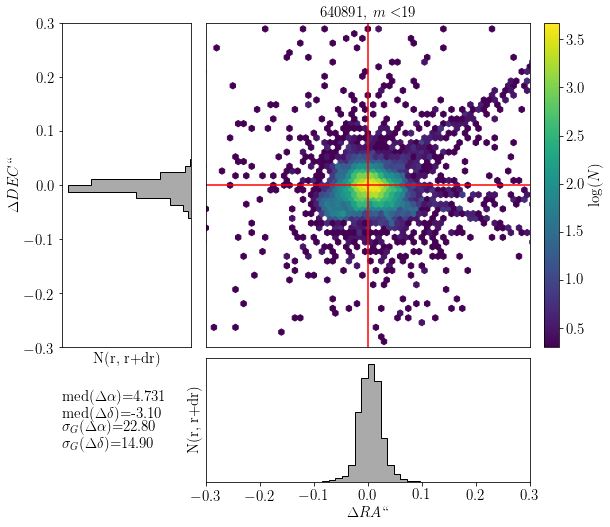

Comparing DECAPS-LSST for  641497


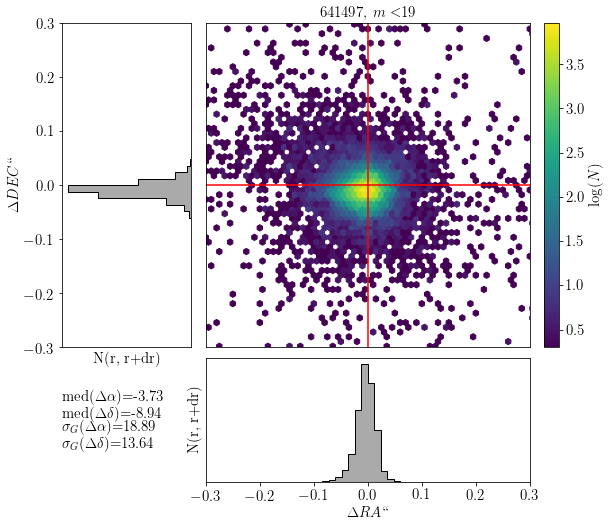

Comparing DECAPS-LSST for  641548


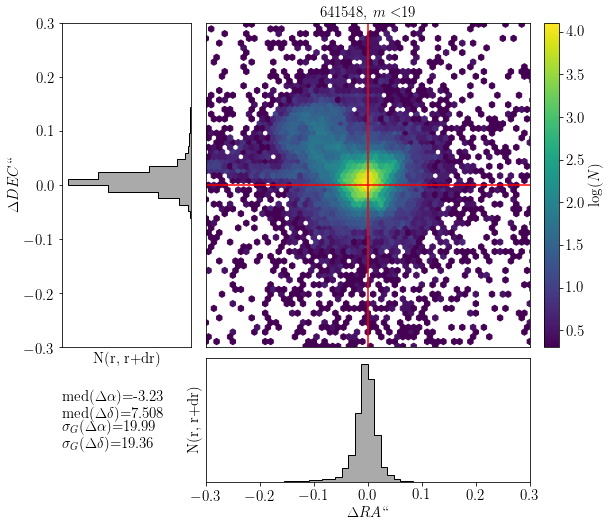

Comparing DECAPS-LSST for  644074


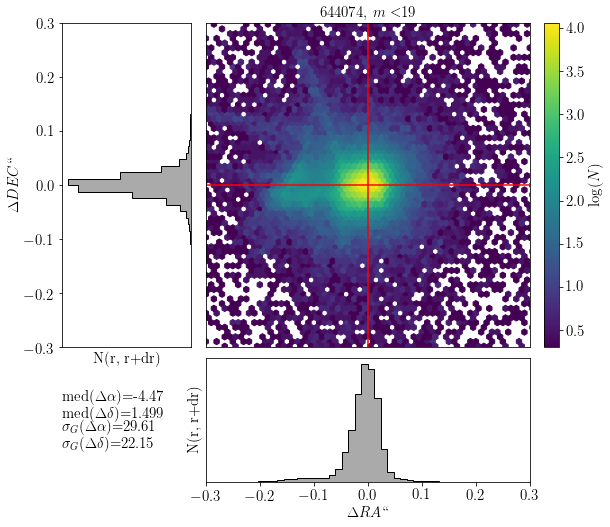

Comparing DECAPS-LSST for  644082


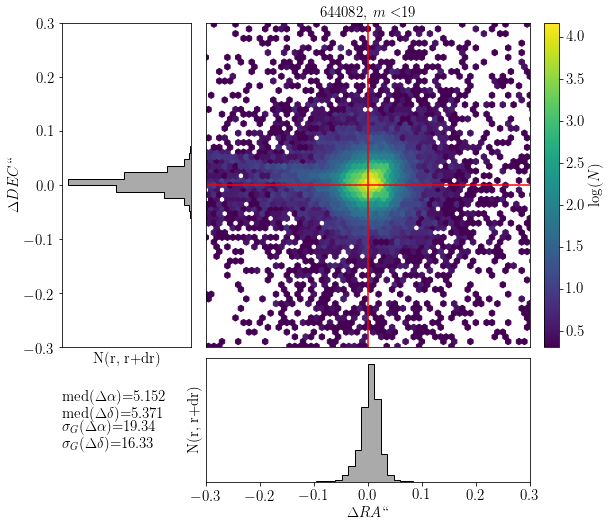

Comparing DECAPS-LSST for  644125


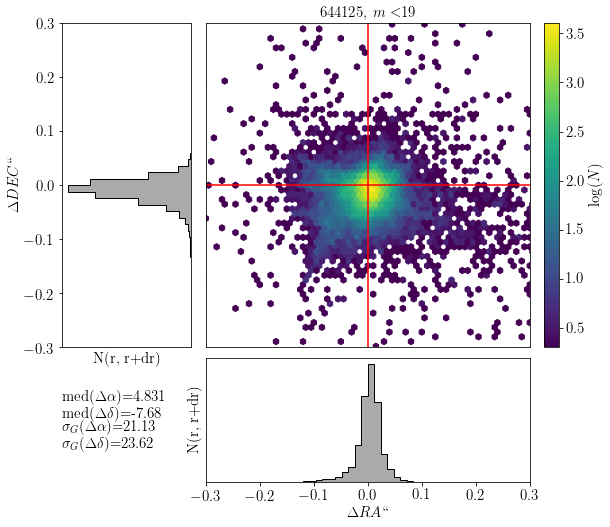

Comparing DECAPS-LSST for  644144


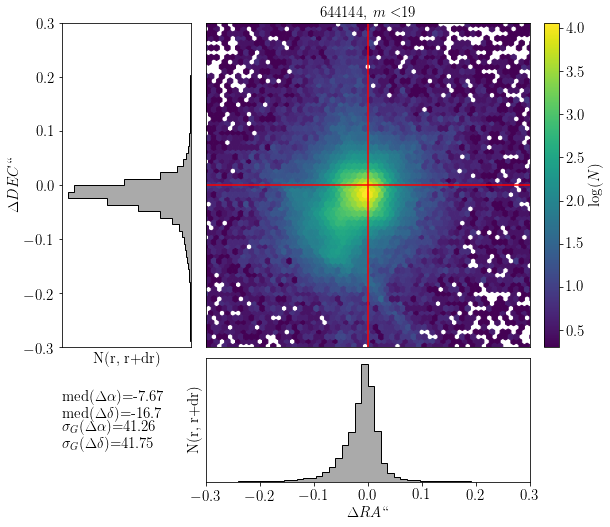

Comparing DECAPS-LSST for  645251


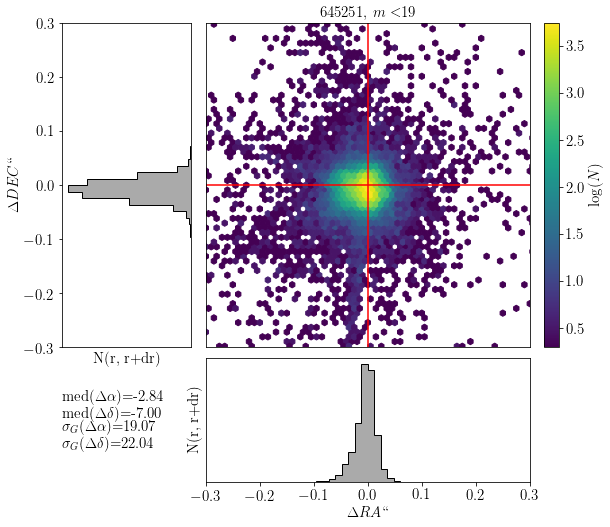

Done


In [10]:
# Combine epoch1, epoch2 visits,  
# which can still serve for LSST-DECAPS 
# comparison 
#visits = np.append(visit_info['visit_1'].data,visit_info['visit_2'].data)
#radec_lsst_decaps  = {'visit':np.zeros_like(visits,dtype=float),
##                      'med_ra':np.zeros_like(visits,dtype=float),
#                      'med_dec':np.zeros_like(visits,dtype=float),
#                      'sig_ra':np.zeros_like(visits,dtype=float),
#                      'sig_dec':np.zeros_like(visits,dtype=float)
#                     }
#radec_ld = Table(radec_lsst_decaps)

visit_info['med_dra'] = 0.0
visit_info['med_ddec'] = 0.0 
visit_info['sig_dra'] = 0.0
visit_info['sig_ddec'] = 0.0

visit_info['med_dra']  = visit_info['med_dra'].astype(float)
visit_info['med_ddec'] = visit_info['med_dra'].astype(float)
visit_info['sig_dra']  = visit_info['med_dra'].astype(float)
visit_info['sig_ddec'] = visit_info['med_dra'].astype(float)

for i,visit in enumerate(visit_info['visit']) :
    print('Comparing DECAPS-LSST for ', visit)
    decaps_lsst = Table.read('decaps-lsst-'+str(visit)+'.txt', format='ascii')
         
    # introduce the magnitude cut ... 
    mag_cut  = 19
    
    # plot or not ? 
    plot = True
    
    m = decaps_lsst['decaps_mag'].data < mag_cut
    
    decaps_coord = SkyCoord(ra = decaps_lsst['decaps_ra'].data[m], 
                           dec = decaps_lsst['decaps_dec'].data[m], 
                       unit='degree', frame='icrs')

    lsst_coord = SkyCoord(ra = decaps_lsst['lsst_ra'][m]*u.radian, 
                          dec= decaps_lsst['lsst_dec'][m]*u.radian)  

    dra_raw = decaps_coord.ra.arcsec- lsst_coord.ra.arcsec
    ddec = decaps_coord.dec.arcsec-lsst_coord.dec.arcsec
    
    # correct for cosine of declination 
    dra = dra_raw * np.cos(decaps_coord.dec.radian)
    
    if plot : 
        dic   = plot_dra_ddec_lsst_decaps(dra,ddec,visit, mag_cut)
        visit_info['med_dra'][i] = dic['medra']
        visit_info['med_ddec'][i] = dic['meddec']
        visit_info['sig_dra'][i] = dic['sigra']
        visit_info['sig_ddec'][i] = dic['sigdec']
    else:
        medra, meddec = 1000*np.median(dra),1000*np.median(ddec)  # miliarcsec 
        sigra, sigdec = 1000*sigmaG(dra), 1000*sigmaG(ddec)
        visit_info['med_dra'][i]  = medra
        visit_info['med_ddec'][i] = meddec
        visit_info['sig_dra'][i]  = sigra
        visit_info['sig_ddec'][i] = sigdec

visit_info.write('decaps_lsst_visit_info_astrometry.txt', format='ascii')
print('Done')

In [11]:
#visit_info[:2]

(array([  6842.,  12139.,  16065.,  13207.,  15428.,  12698.,  15662.,
         14972.,  11975.,   7722.]),
 array([ 0.59830397,  0.60100811,  0.60371225,  0.60641639,  0.60912053,
         0.61182467,  0.61452881,  0.61723295,  0.61993709,  0.62264123,
         0.62534537]),
 <a list of 10 Patch objects>)

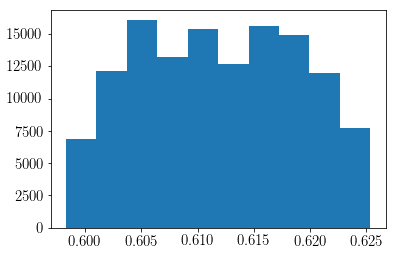

In [12]:
plt.hist(np.cos(decaps_coord.dec.radian))

In [14]:
visit_info.write('decaps_lsst_visit_info_astrometry.txt', format='ascii',
                overwrite='True')

#### Read the saved $\Delta \alpha$, $\Delta \delta$, plot the summaries

In [87]:
visit_info = Table.read('decaps_lsst_visit_info_astrometry.txt', format='ascii')

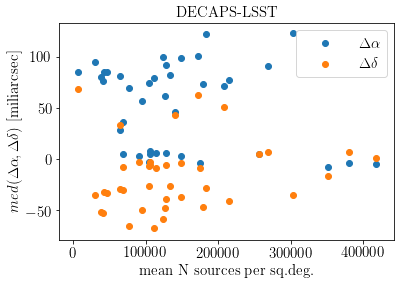

In [15]:
plt.title('DECAPS-LSST')
plt.scatter(visit_info['mean_N_per_sq_deg'], visit_info['med_dra'], 
            label=r'$\Delta \alpha$')
plt.scatter(visit_info['mean_N_per_sq_deg'], visit_info['med_ddec'],
           label=r'$\Delta \delta$')
plt.legend()
plt.xlabel('mean N sources per sq.deg.')
plt.ylabel(r'$med(\Delta \alpha, \Delta \delta)$'+' [miliarcsec]')
plt.savefig('Astrometry_DECAPS-LSST_med.png', bbox_inches='tight')

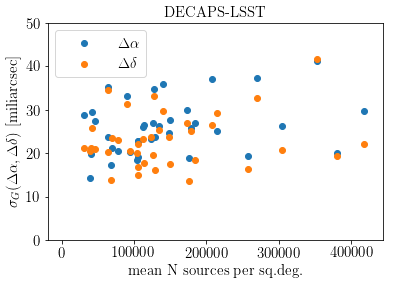

In [17]:
plt.scatter(visit_info['mean_N_per_sq_deg'], visit_info['sig_dra'], 
            label=r'$\Delta \alpha$')
plt.scatter(visit_info['mean_N_per_sq_deg'], visit_info['sig_ddec'], 
            label=r'$\Delta \delta$')
plt.legend()
plt.ylim(0,50)
plt.title('DECAPS-LSST')
plt.xlabel('mean N sources per sq.deg.')
plt.ylabel(r'$\sigma_{G}(\Delta \alpha, \Delta \delta)$'+' [miliarcsec]')
plt.savefig('Astrometry_DECAPS-LSST_sig.png', bbox_inches='tight')

In [20]:
radec_ld = visit_info.copy()
radec_ld.rename_column('med_dra', r'$\mathrm{median}(\Delta\alpha)$')
radec_ld.rename_column('med_ddec', r'$\mathrm{median}(\Delta\delta)$')
radec_ld.rename_column('sig_dra', r'$\sigma_{G}(\Delta\alpha)$')
radec_ld.rename_column('sig_ddec', r'$\sigma_{G}(\Delta\delta)$')
# Round all measurements to two decimal places 
for i in range(1,5):
    col = radec_ld.columns.keys()[i]
    radec_ld[col] =radec_ld[col].round(2) 

    
# Change visit to int 
radec_ld['visit'] = radec_ld['visit'].astype(int)

# Save as LaTeX table
radec_ld.write('radec_lsst_decaps.txt', format='latex', overwrite=True)

**LSST-LSST**  and **DECAPS-DECAPS** : 

In [21]:
def plot_dra_ddec_epoch_epoch(dra,ddec, visit1,visit2, source,mag_cut):
    fig = plt.figure(figsize=(10, 7.5))
    lim  = 0.3  
    # First axis : the hexbin plot ... 
    ax = fig.add_axes([0.35, 0.35, 0.45, 0.6], xticks=[], yticks=[])
    im1 = ax.hexbin(dra, ddec, bins='log', cmap=plt.cm.viridis,
                   mincnt=1, extent=(-0.5, 0.5, -0.5,0.5))
    ax.set_title(str(visit1)+'-'+str(visit2)+', '+r'$m<$'+str(mag_cut))
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.plot([-lim,lim], [0.0, 0.0], '-k', c='red')
    ax.plot([0,0], [-lim, lim], '-k', c='red')

    # Add colorbar 
    cax = plt.axes([0.82, 0.35, 0.02, 0.6])
    cb = plt.colorbar(im1, cax=cax)
    cb.set_label(r'$\log (N)$')
    #plt.clim(-7, 0)
    
    # Bottom axis : histogram of RA 
    ax1 = fig.add_axes([0.35, 0.1, 0.45, 0.23], yticks=[])
    ax1.hist(dra.data, bins=50, histtype='stepfilled', ec='k', fc='#AAAAAA',
             range=(-lim,lim))
    ax1.set_xlabel(r'$\Delta RA ``$')
    ax1.set_ylabel('N(r, r+dr)')
    ax1.set_xlim(-lim,lim)

    # Left axis : histogram of DEC 
    # #https://matplotlib.org/examples/pylab_examples/scatter_hist.html
    ax2 = fig.add_axes([0.15, 0.35, 0.18, 0.6], xticks=[])
    ax2.hist(ddec.data,orientation='horizontal',bins=50, 
             histtype='stepfilled', ec='k', fc='#AAAAAA',
             range=(-lim,lim))
    ax2.set_xlabel('N(r, r+dr)')
    ax2.set_ylabel(r'$\Delta DEC ``$')
    ax2.set_ylim(-lim,lim)
    ax2.set_xlim(ax2.get_xlim()[::-1])  # reverse x axis
    
    # calcualate median and sigmaG
    medra , meddec = 1000*np.median(dra),1000*np.median(ddec)  # miliarcsec 
    sigra,sigdec = 1000*sigmaG(dra), 1000*sigmaG(ddec)
    dic = {'medra':medra, 'meddec':meddec, 'sigra':sigra, 'sigdec':sigdec}
    # add the info to the plot 
    d = 0.03
    x0,y0 = 0.15, 0.25 
    fig.text(x0,y0, 'med'+r'$(\Delta\alpha)$='+str(medra)[:5])
    fig.text(x0,y0-d, 'med'+r'$(\Delta\delta)$='+str(meddec)[:5])
    fig.text(x0,y0-2*d, r'$\sigma_{G}$'+r'$(\Delta\alpha)$='+str(sigra)[:5])
    fig.text(x0,y0-3*d, r'$\sigma_{G}$'+r'$(\Delta\delta)$='+str(sigdec)[:5])
    
    plt.savefig(source+str(visit1)+'-'+str(visit2)+'_RA_DEC_offset_lims.png', 
                bbox_inches='tight')
    plt.show()
    return dic


In the visit_info below, N1 is the mean number of sources from LSST and DECAPS processings of the visit1,  and N2 is the same for visit2. meanN is the mean of N1 and N2. All are in number of sources per sq. deg. 

In [46]:
visit_info[:3]

<Table length=3>
visit_1   ra_1     dec_1   magzero_1 visit_2 ...     dmjd      N1    N2   meanN 
 int64  float64   float64   float64   int64  ...   float64   int64 int64 float64
------- -------- --------- --------- ------- ... ----------- ----- ----- -------
 525846 133.5462 -44.27313    29.738  530012 ... 13.00447798 40602 38865 39733.5
 525900 140.6165 -48.15003    29.772  529989 ... 12.91695244 42753 46402 44577.5
 525814 126.4261 -43.06979   29.4545  529974 ... 12.99238801 64425 68486 66455.5

Comparing  525846  to  530012  of  decaps


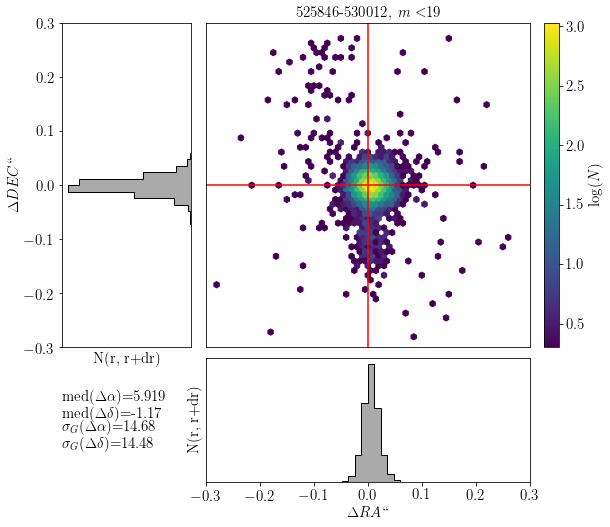

Comparing  525900  to  529989  of  decaps


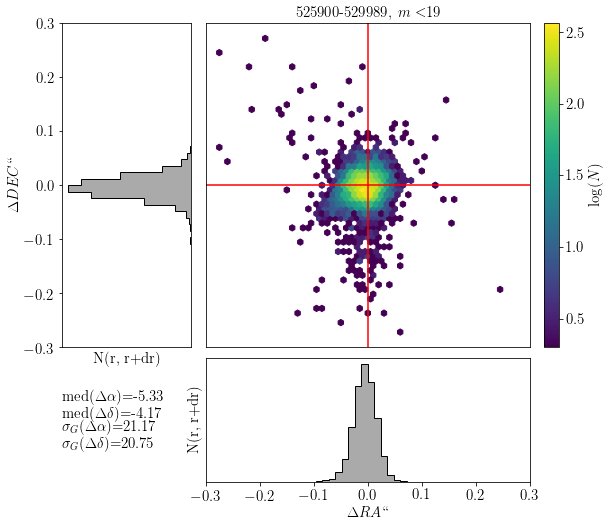

Comparing  525814  to  529974  of  decaps


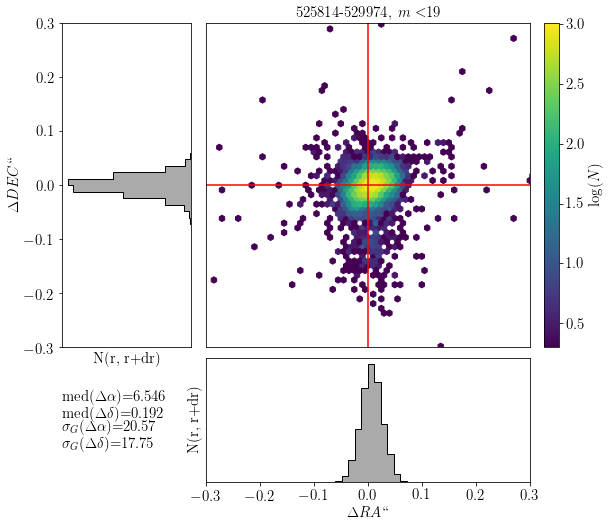

Comparing  525838  to  527247  of  decaps


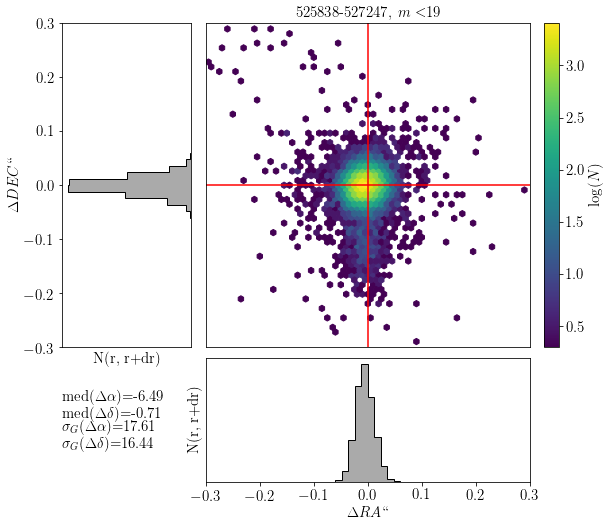

Comparing  525837  to  527246  of  decaps


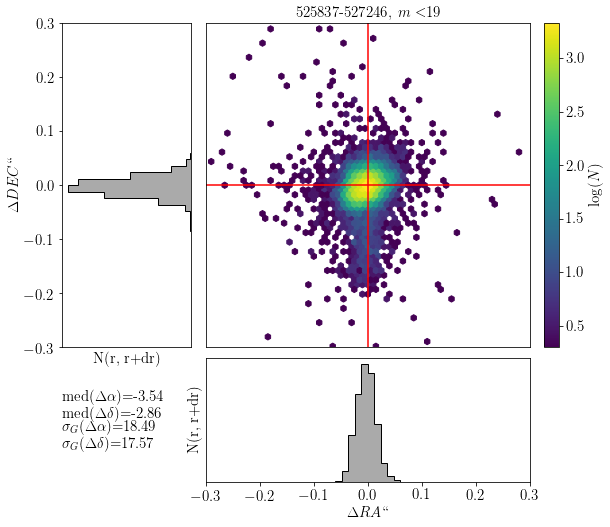

Comparing  525920  to  527296  of  decaps


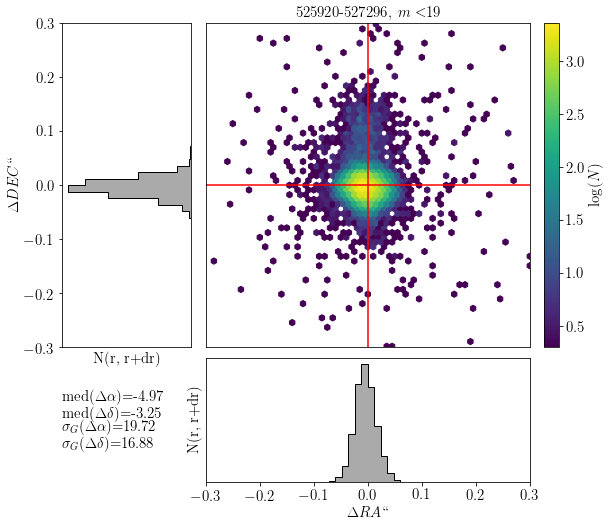

Comparing  525904  to  527300  of  decaps


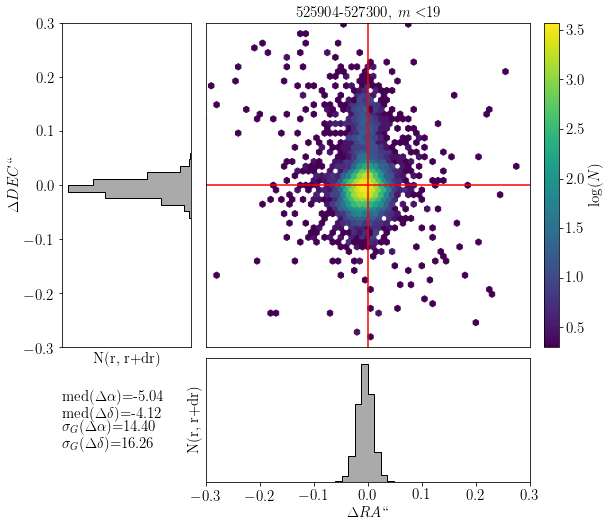

Comparing  525879  to  530032  of  decaps


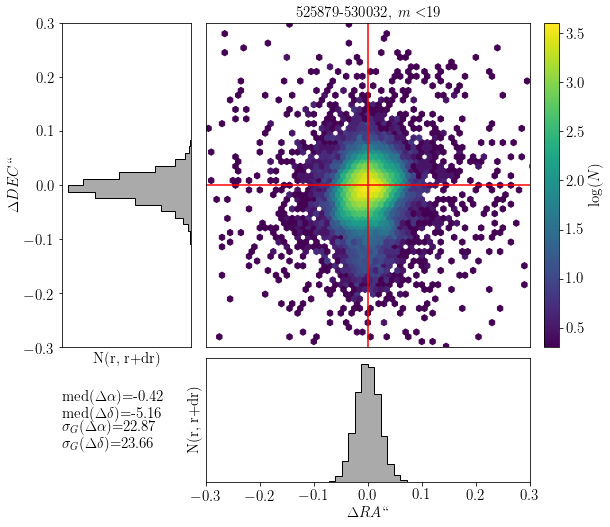

Comparing  525846  to  530012  of  lsst


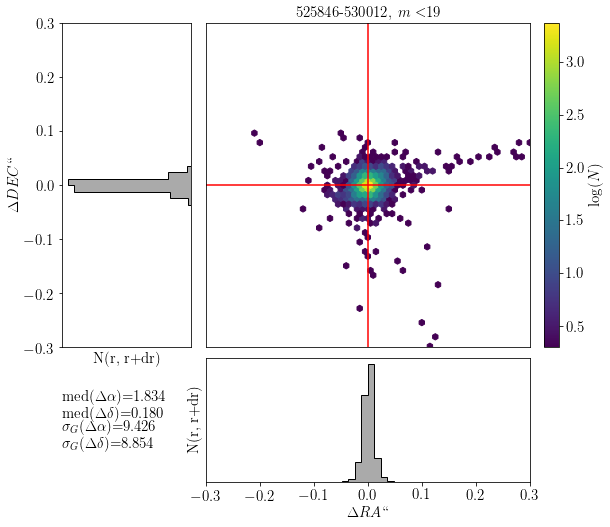

Comparing  525900  to  529989  of  lsst


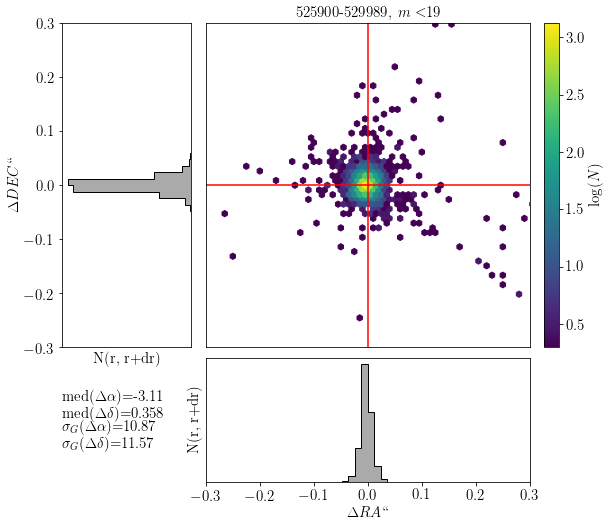

Comparing  525814  to  529974  of  lsst


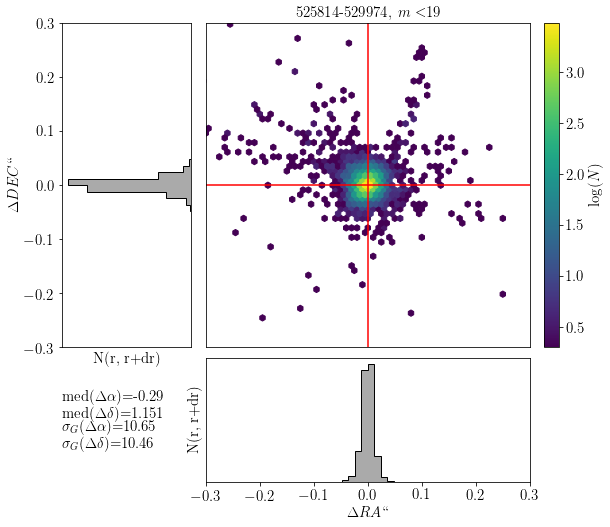

Comparing  525838  to  527247  of  lsst


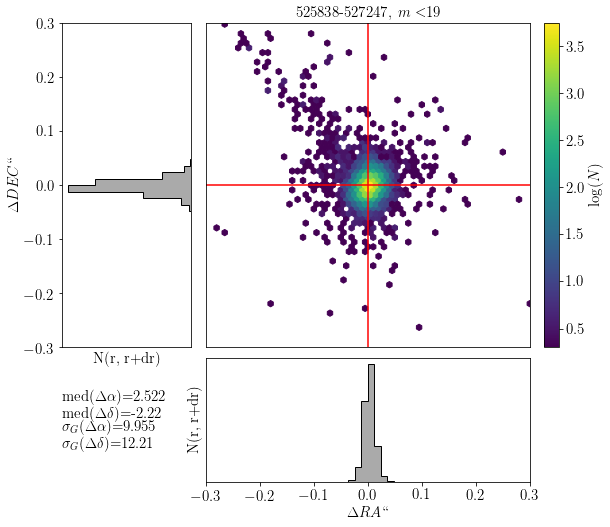

Comparing  525837  to  527246  of  lsst


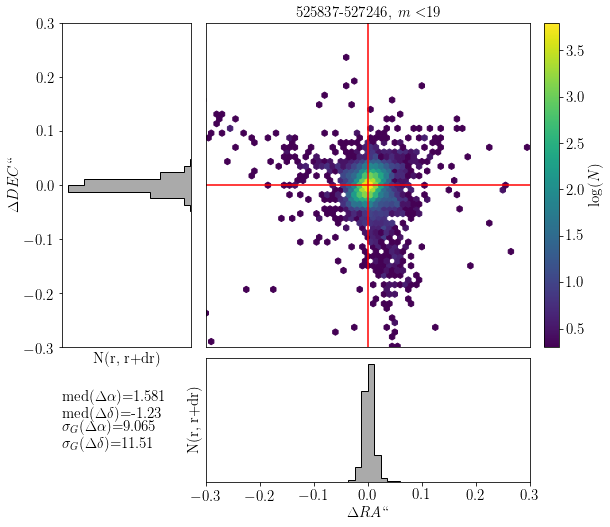

Comparing  525920  to  527296  of  lsst


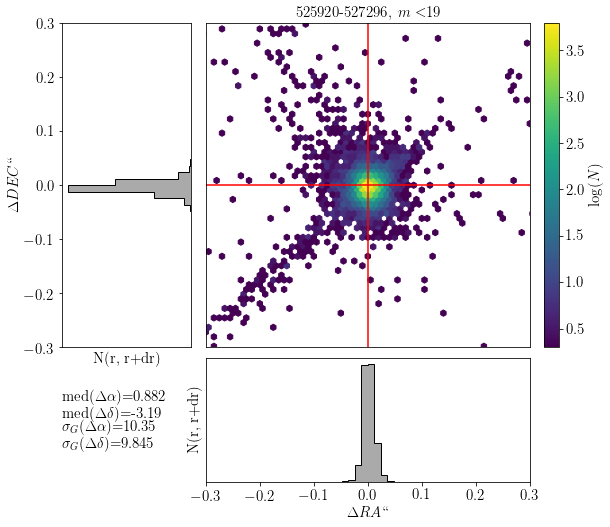

Comparing  525904  to  527300  of  lsst


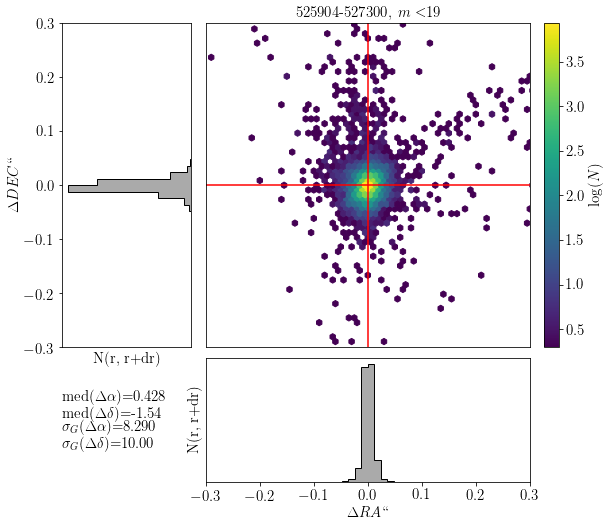

Comparing  525879  to  530032  of  lsst


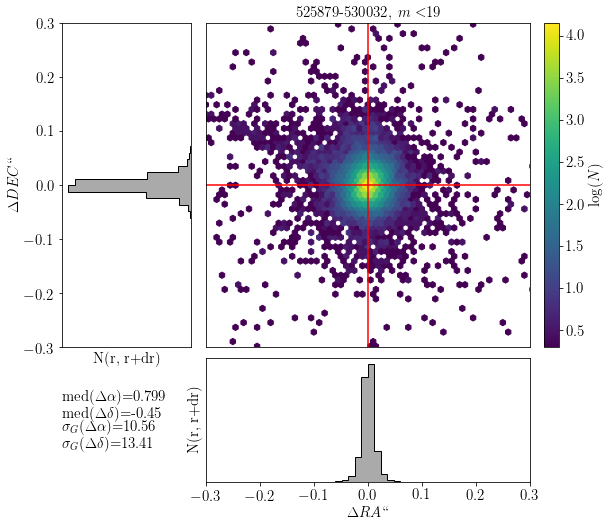

Done


In [22]:
visit_info = Table.read('decaps_visits_epoch12_more.txt', format='ascii')
# this table has info with one row per pair. It 
# contains the mean density measurements per pair, 
# found from taking the mean of mean(LSST-DECAPS) source
# count per field 

pairs = [[visit_info['visit_1'][i],visit_info['visit_2'][i]] 
         for i in range(len(visit_info))]

radec_lsst_lsst  = {'visit1':np.zeros_like(visit_info,dtype=float),
                    'visit2':np.zeros_like(visit_info,dtype=float),
                  'med_ra':np.zeros_like(visit_info,dtype=float),
                  'med_dec':np.zeros_like(visit_info,dtype=float),
                  'sig_ra':np.zeros_like(visit_info,dtype=float),
                  'sig_dec':np.zeros_like(visit_info,dtype=float),
                    'meanN':np.zeros_like(visit_info,dtype=float)
                     }
radec_decaps_decaps  = {'visit1':np.zeros_like(visit_info,dtype=float),
                    'visit2':np.zeros_like(visit_info,dtype=float),
                  'med_ra':np.zeros_like(visit_info,dtype=float),
                  'med_dec':np.zeros_like(visit_info,dtype=float),
                  'sig_ra':np.zeros_like(visit_info,dtype=float),
                  'sig_dec':np.zeros_like(visit_info,dtype=float),
                        'meanN':np.zeros_like(visit_info,dtype=float)
                     }

radec_ll = Table(radec_lsst_lsst)
radec_dd = Table(radec_decaps_decaps)

mag_cut  = 19
for source in  ['decaps','lsst']:
    i = 0 
    for pair in pairs : 
        visit1,visit2 = pair[0], pair[1]
        print('Comparing ', visit1, ' to ', visit2, ' of ', source )
        meanN = visit_info[visit_info['visit_1'] == visit1]['meanN'][0]

        # read the cross-matched catalog 
        fname  = source+'-'+source+str(visit1)+'-'+str(visit2)+'.txt'
        cat = Table.read(fname, format='ascii')

        # the two coordinates ... 
        if source is 'lsst':
            epoch1 = SkyCoord(ra = cat[source+'_ra_1']*u.radian, 
                                   dec = cat[source+'_dec_1']*u.radian)
            epoch2 = SkyCoord(ra = cat[source+'_ra_2']*u.radian, 
                                   dec = cat[source+'_dec_2']*u.radian)
        if source is 'decaps' : 
            epoch1 = SkyCoord(ra = cat[source+'_ra_1'].data, 
                                   dec = cat[source+'_dec_1'].data,
                                   unit='degree', frame='icrs')
            epoch2 = SkyCoord(ra = cat[source+'_ra_2'].data, 
                                   dec = cat[source+'_dec_2'].data,
                                   unit='degree', frame='icrs')
            
        # the coordinate difference 
        dra_raw = epoch2.ra.arcsec - epoch1.ra.arcsec
        ddec = epoch2.dec.arcsec - epoch1.dec.arcsec
        
        # cos(declination) correction
        dra  = dra_raw * np.cos(epoch1.dec.radian)
        
        # impose the magnitude cut 
        m = cat[source+'_mag_1'].data < mag_cut
        
        dic = plot_dra_ddec_epoch_epoch(dra[m],ddec[m], visit1,visit2, 
                                        source,mag_cut)
        
        if source  is 'decaps':
            radec_dd['visit1'][i] = visit1 
            radec_dd['visit2'][i] = visit2
            radec_dd['sig_ra'][i] = dic['sigra']
            radec_dd['sig_dec'][i] = dic['sigdec']
            radec_dd['med_ra'][i] = dic['medra']
            radec_dd['med_dec'][i] = dic['meddec']
            radec_dd['meanN'][i] = meanN
            
        if source is 'lsst' : 
            radec_ll['visit1'][i] = visit1 
            radec_ll['visit2'][i] = visit2
            radec_ll['sig_ra'][i] = dic['sigra']
            radec_ll['sig_dec'][i] = dic['sigdec']
            radec_ll['med_ra'][i] = dic['medra']
            radec_ll['med_dec'][i] = dic['meddec']
            radec_ll['meanN'][i] = meanN
        
        i += 1 
print('Done')

### Summarize this information .. 

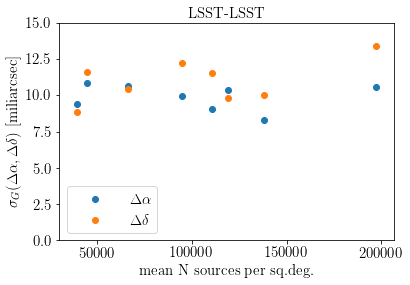

In [26]:
plt.scatter(radec_ll['meanN'], radec_ll['sig_ra'], label=r'$\Delta \alpha$')
plt.scatter(radec_ll['meanN'], radec_ll['sig_dec'],label=r'$\Delta \delta$')
plt.title('LSST-LSST')
plt.legend()
plt.ylim(0,15)
plt.xlabel('mean N sources per sq.deg.')
plt.ylabel(r'$\sigma_{G}(\Delta \alpha, \Delta \delta)$'+' [miliarcsec]')
plt.savefig('Astrometry_LSST_LSST.png', bbox_inches='tight')

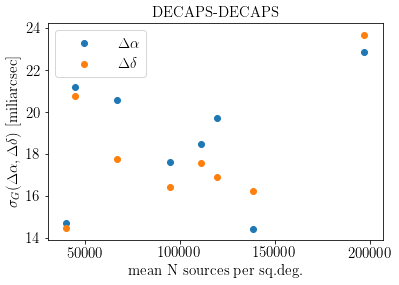

In [27]:
plt.scatter(radec_dd['meanN'], radec_dd['sig_ra'], label=r'$\Delta \alpha$')
plt.scatter(radec_dd['meanN'], radec_dd['sig_dec'],label=r'$\Delta \delta$')
plt.title('DECAPS-DECAPS')
plt.legend()
plt.xlabel('mean N sources per sq.deg.')
plt.ylabel(r'$\sigma_{G}(\Delta \alpha, \Delta \delta)$'+' [miliarcsec]')
plt.savefig('Astrometry_DECAPS_DECAPS.png', bbox_inches='tight')

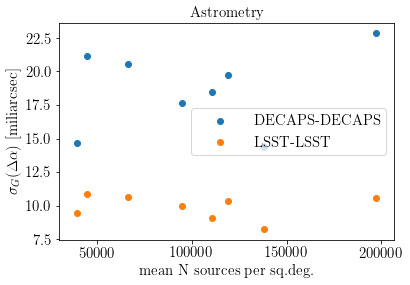

In [28]:
plt.scatter(radec_dd['meanN'], radec_dd['sig_ra'], label='DECAPS-DECAPS')
plt.scatter(radec_ll['meanN'], radec_ll['sig_ra'], label='LSST-LSST')
plt.title('Astrometry')
plt.legend()
plt.xlabel('mean N sources per sq.deg.')
plt.ylabel(r'$\sigma_{G}(\Delta \alpha)$'+' [miliarcsec]')
plt.savefig('Astrometry_DD-LL_ra.png', bbox_inches='tight')

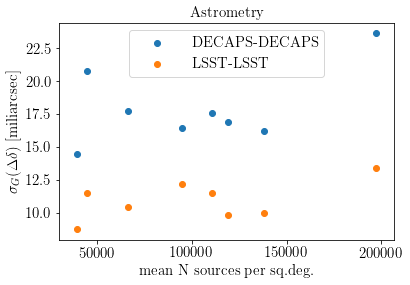

In [29]:
plt.scatter(radec_dd['meanN'], radec_dd['sig_dec'], label='DECAPS-DECAPS')
plt.scatter(radec_ll['meanN'], radec_ll['sig_dec'], label='LSST-LSST')
plt.title('Astrometry')
plt.legend()
plt.xlabel('mean N sources per sq.deg.')
plt.ylabel(r'$\sigma_{G}(\Delta \delta)$'+' [miliarcsec]')
plt.savefig('Astrometry_DD-LL_dec.png', bbox_inches='tight')

In [30]:
for t in [radec_ll, radec_dd]:
    #t.rename_column('med_ra', r'$\mathrm{median}(\Delta\alpha)$')
    #t.rename_column('med_dec', r'$\mathrm{median}(\Delta\delta)$')
    #t.rename_column('sig_ra', r'$\sigma_{G}(\Delta\alpha)$')
    #t.rename_column('sig_dec', r'$\sigma_{G}(\Delta\delta)$')
    # Round all measurements to two decimal places 
    for i in range(1,6):
        col = t.columns.keys()[i]
        t[col] =t[col].round(2) 
    # Change visit to int 
    t['visit1'] = t['visit1'].astype(int)
    t['visit2'] = t['visit2'].astype(int)

# Save as LaTeX table
radec_ll.write('radec_lsst_lsst.txt', format='latex', overwrite=True)
radec_dd.write('radec_decaps_decaps.txt', format='latex', overwrite=True)

In [31]:
radec_dd

<Table length=8>
visit1 visit2  med_ra med_dec  sig_ra sig_dec  meanN  
int64  int64  float64 float64 float64 float64 float64 
------ ------ ------- ------- ------- ------- --------
525846 530012    5.92   -1.18   14.69   14.49  39733.5
525900 529989   -5.34   -4.18   21.18   20.76  44577.5
525814 529974    6.55    0.19   20.58   17.76  66455.5
525838 527247    -6.5   -0.72   17.62   16.45  94766.5
525837 527246   -3.55   -2.86    18.5   17.57 110734.0
525920 527296   -4.97   -3.26   19.72   16.88 119371.5
525904 527300   -5.05   -4.13    14.4   16.26 138384.5
525879 530032   -0.43   -5.17   22.88   23.66 197058.0